# MOVIE LAND PROJECT

## Business understanding

The purpose of this analysis is to help Movieland gain insights into the most well-received movie based on viewer ratings and reviews. By analyzing the IMDb review dataset, the company can determine the movie with the highest average rating and the number of reviewers who gave it the highest rating. Additionally, Movieland can also determine the least favorable rating and the corresponding review detail for the movie with the highest average rating. This information can help the company make informed decisions about their next project and target a similar audience.

By understanding the most well-received movie and the reasons why it was well received, Movieland can aim to create similar content that appeals to a similar audience. On the other hand, by understanding the least favorable rating and review, the company can avoid making similar mistakes in their next project.

In [1]:
# Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the dataset

url = 'https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows'

df = pd.read_csv('C:/Users/user/Downloads/archive.zip',compression='zip', header=0, sep=',', quotechar='"')
#print the first five
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Exploratory Data Analysis

In [3]:
# changing column names to lower case and columns to their respective datatypes
# Droping irrelevant columns

df2 = df.rename(columns =
          lambda c:c.lower()).assign(series_title = lambda df_:df_.series_title.astype('string'),
                                     released_year = lambda df_:df_.released_year.replace({'PG':np.nan}).astype('Int64'),
                                    runtime = lambda df_:df_.runtime.str.extract(r'(\d+)').astype('Int64'),
                                    imdb_rating = lambda df_:df_.imdb_rating.astype('float'),
                                    overview = lambda df_:df_.overview.astype('string'),
                                    no_of_votes = lambda df_:df_.no_of_votes.astype('Int64')).drop(['poster_link', 'star1', 'star2', 'star3','star4', 'director','certificate'],axis = 1)
        

In [4]:
# converting runtime to timedelta datatype

df2['runtime'] = pd.to_timedelta(df2['runtime'], unit = 'm')

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   series_title   1000 non-null   string         
 1   released_year  999 non-null    Int64          
 2   runtime        1000 non-null   timedelta64[ns]
 3   genre          1000 non-null   object         
 4   imdb_rating    1000 non-null   float64        
 5   overview       1000 non-null   string         
 6   meta_score     843 non-null    float64        
 7   no_of_votes    1000 non-null   Int64          
 8   gross          831 non-null    object         
dtypes: Int64(2), float64(2), object(2), string(2), timedelta64[ns](1)
memory usage: 72.4+ KB


In [6]:
df2.isna().sum()

series_title       0
released_year      1
runtime            0
genre              0
imdb_rating        0
overview           0
meta_score       157
no_of_votes        0
gross            169
dtype: int64

In [7]:
df2.set_index('series_title', inplace = True)

In [8]:
df2

,released_year,runtime,genre,imdb_rating,overview,meta_score,no_of_votes,gross
series_title,,,,,,,,
The Shawshank Redemption,1994,0 days 02:22:00,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,2343110,"28,341,469"
The Godfather,1972,0 days 02:55:00,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,1620367,"134,966,411"
The Dark Knight,2008,0 days 02:32:00,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,2303232,"534,858,444"
The Godfather: Part II,1974,0 days 03:22:00,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,1129952,"57,300,000"
12 Angry Men,1957,0 days 01:36:00,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,689845,"4,360,000"
...,...,...,...,...,...,...,...,...
Breakfast at Tiffany's,1961,0 days 01:55:00,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,166544,NaN
Giant,1956,0 days 03:21:00,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,34075,NaN
From Here to Eternity,1953,0 days 01:58:00,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,43374,"30,500,000"


In [9]:
# Group the data by movie and calculate the average rating for each movie

movie_ratings = df2.groupby('series_title').mean().sort_values(by = 'imdb_rating', ascending = False)

movie_ratings

,released_year,imdb_rating,meta_score,no_of_votes
series_title,,,,
The Shawshank Redemption,1994.0,9.3,80.0,2343110.0
The Godfather,1972.0,9.2,100.0,1620367.0
The Dark Knight,2008.0,9.0,84.0,2303232.0
The Godfather: Part II,1974.0,9.0,90.0,1129952.0
12 Angry Men,1957.0,9.0,96.0,689845.0
...,...,...,...,...
Incredibles 2,2018.0,7.6,80.0,250057.0
The Royal Tenenbaums,2001.0,7.6,76.0,266842.0
Hævnen,2010.0,7.6,65.0,38491.0


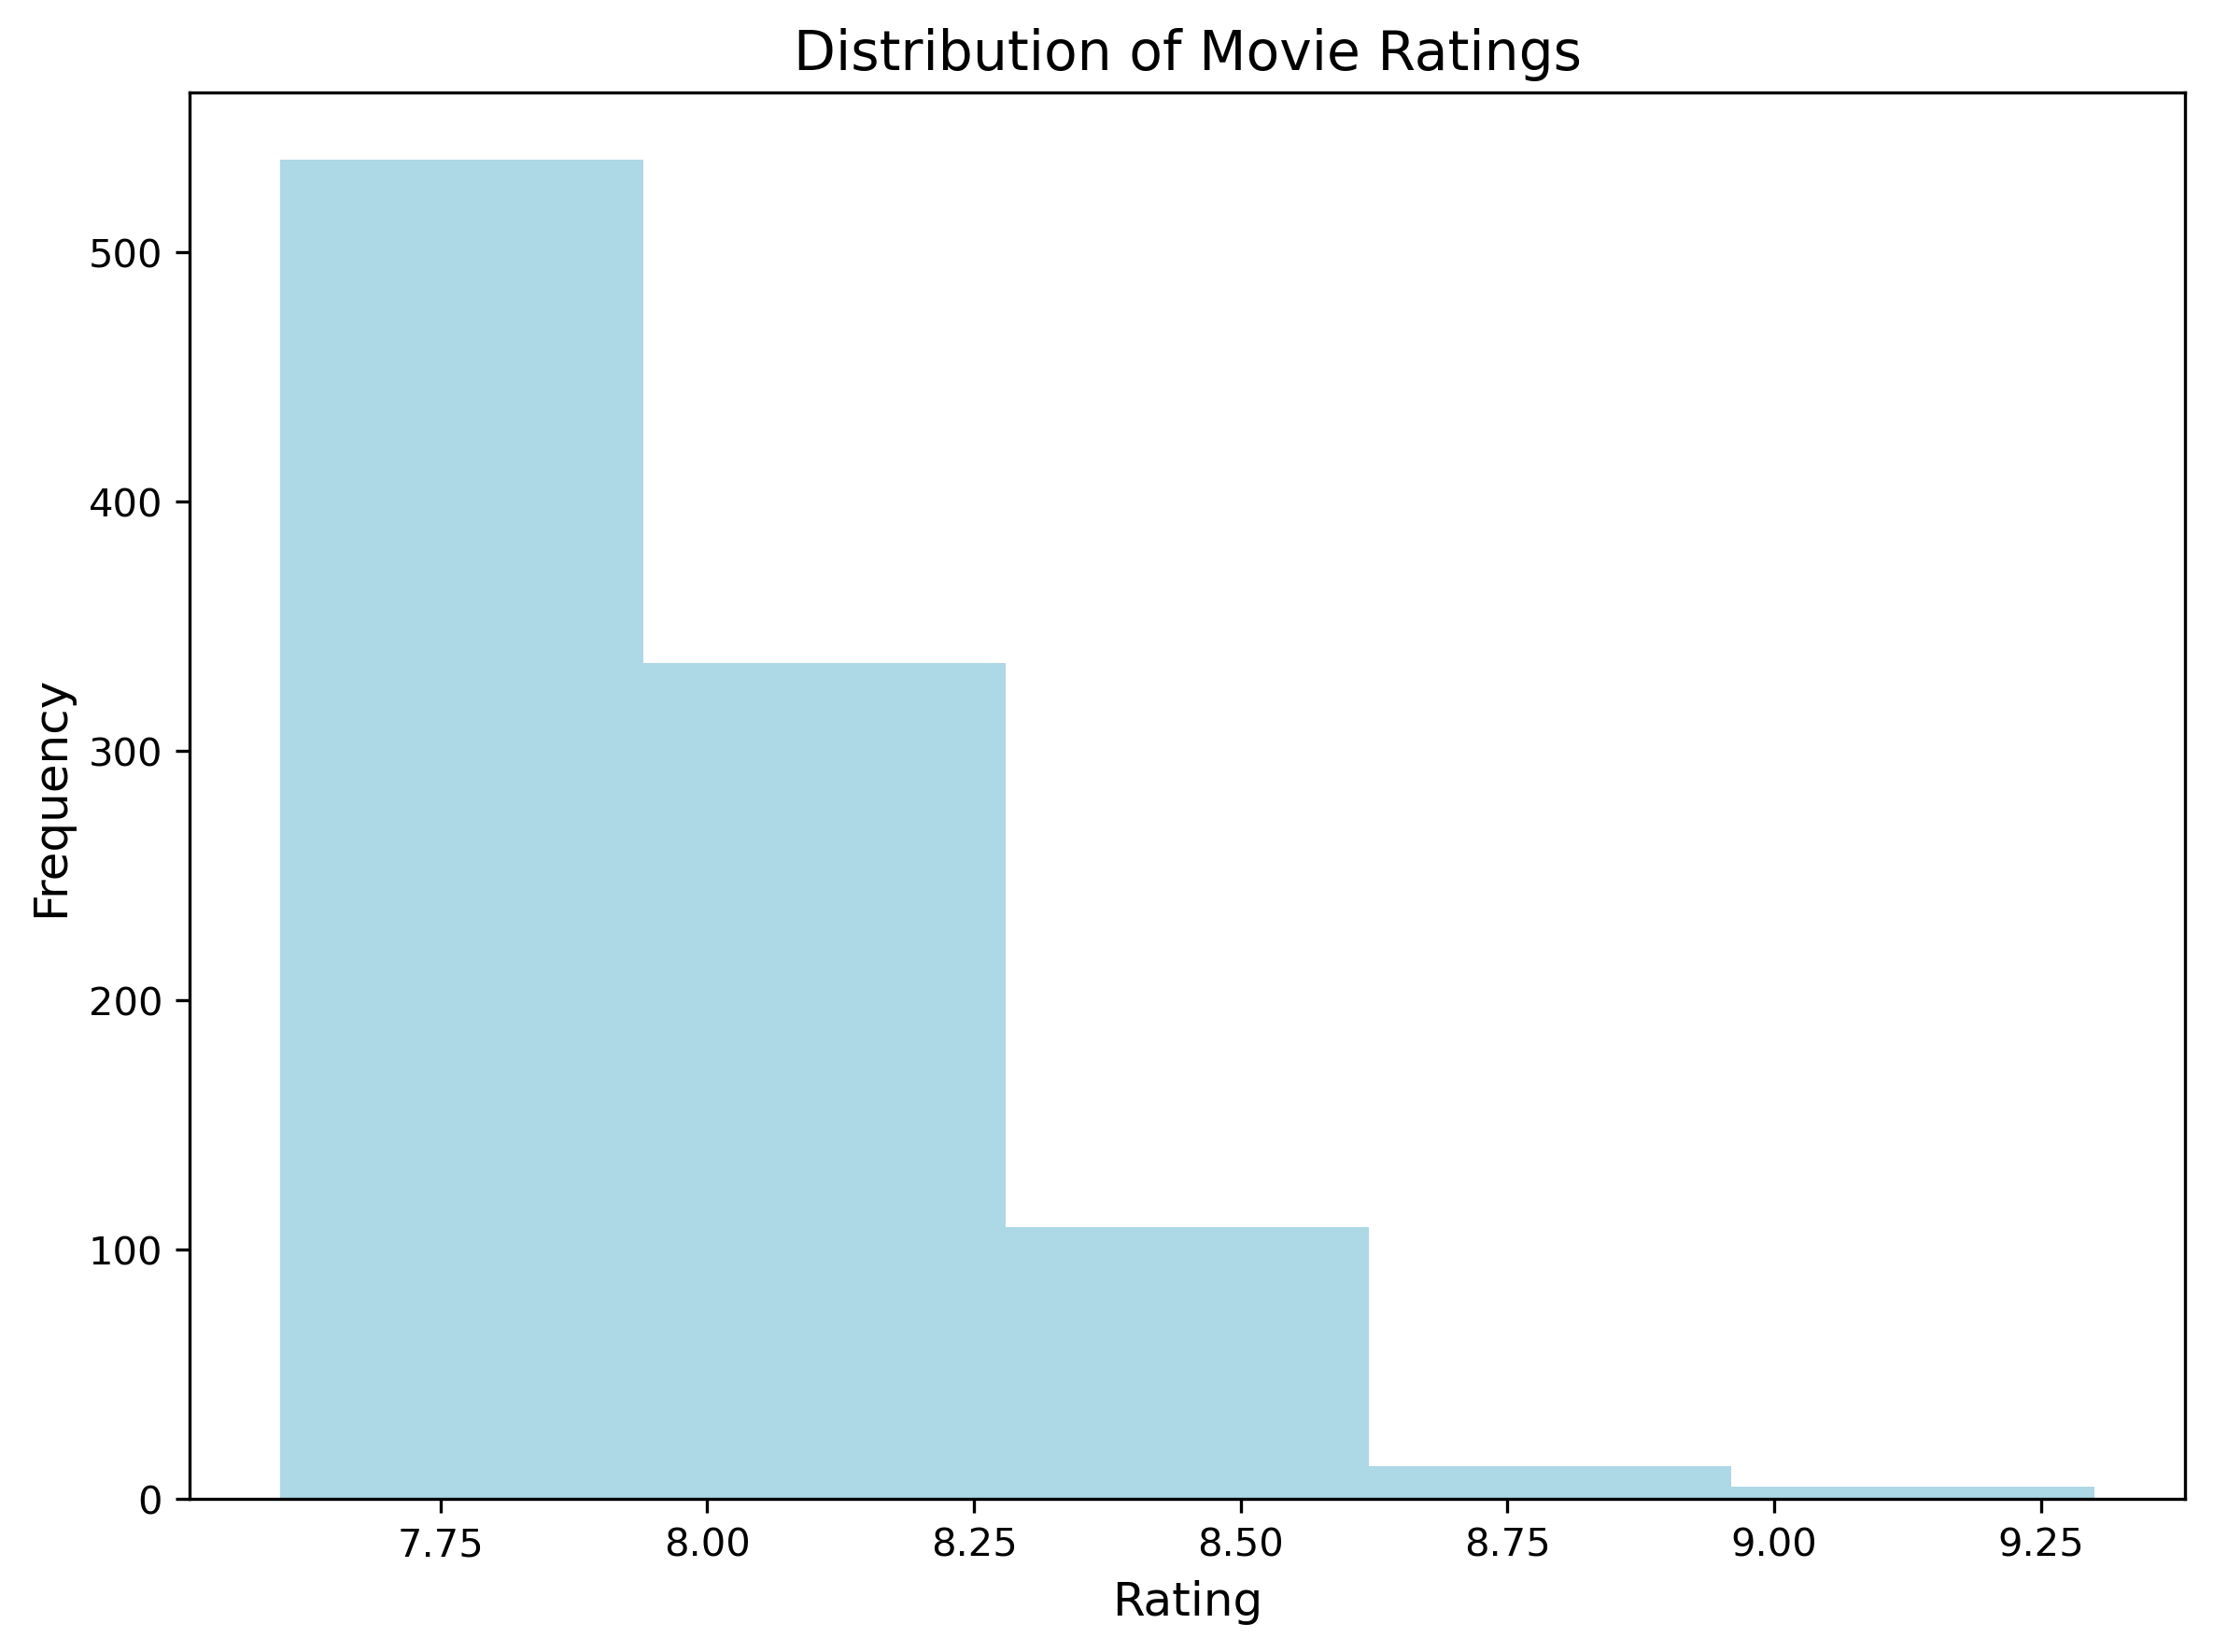

In [18]:
# Visualize the distribution of ratings for the highest rated movie using a histogram
fig, ax = plt.subplots(dpi = 300, figsize=(8,6))
ax.hist(movie_ratings["imdb_rating"], bins=5, color="lightblue")
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Distribution of Movie Ratings", fontsize=14)
plt.tight_layout()
plt.show()


## Which movie had the highest rating?

In [11]:
# Find the movie with the highest average rating
highest_rated_movie = movie_ratings.iloc[[0]]
highest_rated_movie 

,released_year,imdb_rating,meta_score,no_of_votes
series_title,,,,
The Shawshank Redemption,1994.0,9.3,80.0,2343110.0


## How many reviewers gave it the highest rating?

In [12]:
# Count the number of reviews with the maximum rating for the highest rated movie

highest_rating_count = movie_ratings.iloc[[0],[-1]]
highest_rating_count

,no_of_votes
series_title,
The Shawshank Redemption,2343110.0


## What’s its least rating and review detail? 

In [13]:
# Find the lowest rating and its associated review detail for the highest rated movie

least_rating = movie_ratings.iloc[[-1]]

# least_rating_review = sorted_reviews.iloc[0]["review"]

least_rating

,released_year,imdb_rating,meta_score,no_of_votes
series_title,,,,
Mad Max 2,1981.0,7.6,77.0,166588.0
